In [1]:
# 导入包
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
# 设置显示格式
np.set_printoptions(threshold=np.inf)

##https://zhuanlan.zhihu.com/p/138062970

In [2]:
# -*- coding: utf-8 -*-
# 导入数据集
# fashion = tf.keras.datasets.fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0
# print("x_train.shape", x_train.shape)
# # 给数据增加一个维度，使数据和网络结构匹配
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# print("x_train.shape", x_train.shape)

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
x_train, y_train = load_mnist('F://PythonSources//Data//fashion//', kind='train')
x_test, y_test = load_mnist('F://PythonSources//Data//fashion//', kind='t10k')

x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)
# 给数据增加一个维度，使数据和网络结构匹配
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print("x_train.shape", x_train.shape)
#train_labels


x_train.shape (60000, 784)
x_train.shape (60000, 28, 28, 1)


In [3]:
from resnet_model3 import ResNet18

# 运行，一共4个元素，所以block执行4次，每次有2个
model = ResNet18([2, 2, 2, 2])

# 设置优化器等
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

-------------load the model-----------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 41s 690us/sample - loss: 0.1336 - sparse_categorical_accuracy: 0.9567 - val_loss: 0.2865 - val_sparse_categorical_accuracy: 0.9126
Epoch 2/20
60000/60000 [==============================] - 41s 681us/sample - loss: 0.1118 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.2675 - val_sparse_categorical_accuracy: 0.9192
Epoch 3/20
60000/60000 [==============================] - 39s 654us/sample - loss: 0.0943 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.2753 - val_sparse_categorical_accuracy: 0.9252
Epoch 4/20
60000/60000 [==============================] - 40s 660us/sample - loss: 0.0784 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.2968 - val_sparse_categorical_accuracy: 0.9209
Epoch 5/20
60000/60000 [==============================] - 40s 661us/sample - loss: 0.0673 - sparse_categorical_accuracy: 0.9814 - val_loss: 0.2908 - 

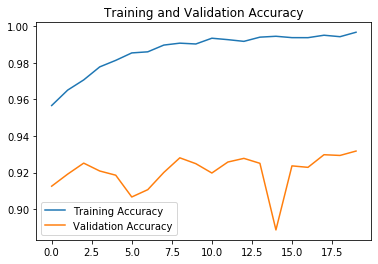

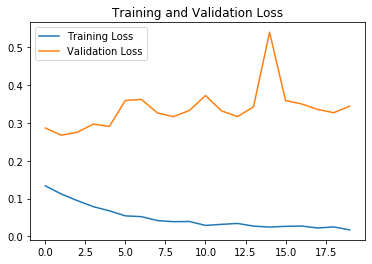

In [5]:




# 设置断点
checkpoint_save_path = "./checkpoint/ResNet18.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
# 显示结果
model.summary()

# 保存权重
# print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()